In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mdpout_descriptors.txt', delim_whitespace=True)

In [3]:
data

,snapshot,pock_volume,pock_asa,pock_pol_asa,pock_apol_asa,pock_asa22,pock_pol_asa22,pock_apol_asa22,nb_AS,mean_as_ray,...,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,1,1104.41,672.76,352.73,320.02,442.39,241.70,200.69,248,4.04,...,0,4,1,0,3,1,0,1,0,0
1,2,1715.91,1006.30,520.83,485.47,681.14,348.56,332.57,385,4.20,...,0,4,2,0,4,2,1,2,0,1
2,3,1494.76,852.19,371.56,480.64,598.50,241.08,357.42,342,4.17,...,0,4,2,0,4,0,1,2,0,2
3,4,1685.72,985.57,495.27,490.30,666.97,376.44,290.52,480,4.14,...,0,4,2,1,5,1,2,2,0,2
4,5,1292.16,725.45,406.64,318.81,459.79,282.03,177.76,331,4.23,...,0,4,2,0,3,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1366.16,834.86,366.30,468.56,558.77,207.09,351.69,517,4.04,...,0,4,2,1,3,0,0,2,0,3
1996,1997,1652.36,1030.92,518.89,512.03,700.88,381.69,319.19,590,4.18,...,0,4,2,1,3,1,0,2,0,2
1997,1998,1634.01,1042.30,537.52,504.79,594.22,328.54,265.68,526,4.02,...,0,4,2,1,4,1,0,2,0,3
1998,1999,1390.50,786.91,410.13,376.78,468.14,223.49,244.65,390,4.00,...,0,4,2,1,3,1,1,2,0,2


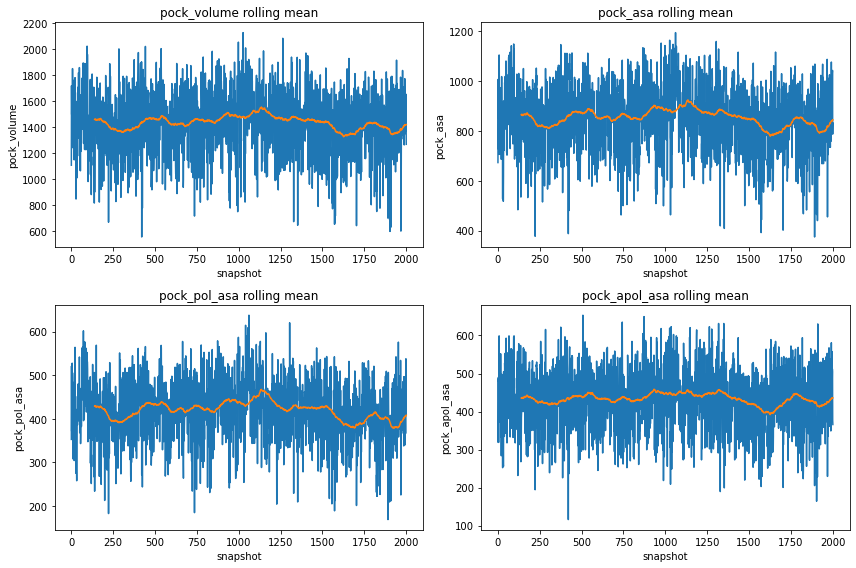

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i, d in enumerate(['pock_volume','pock_asa','pock_pol_asa','pock_apol_asa']):
    sns.lineplot(data=data, x='snapshot', y=d, ax=ax[i//2,i%2])
    sns.lineplot(data=data, x='snapshot', y=data[d].rolling(window=140).mean(), ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(f'{d} rolling mean')
fig.tight_layout()
plt.show()

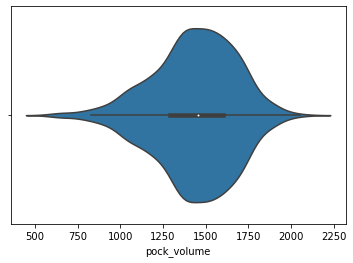

In [34]:
sns.violinplot(data['pock_volume'])

# Análise de cluster

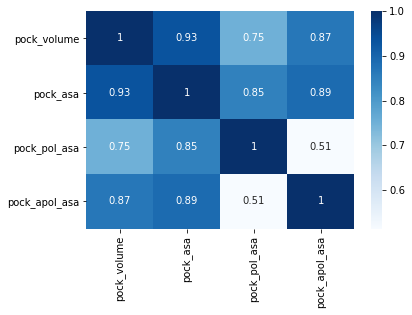

In [35]:
sns.heatmap(data[['pock_volume','pock_asa','pock_pol_asa','pock_apol_asa']].corr(), annot=True, cmap='Blues')

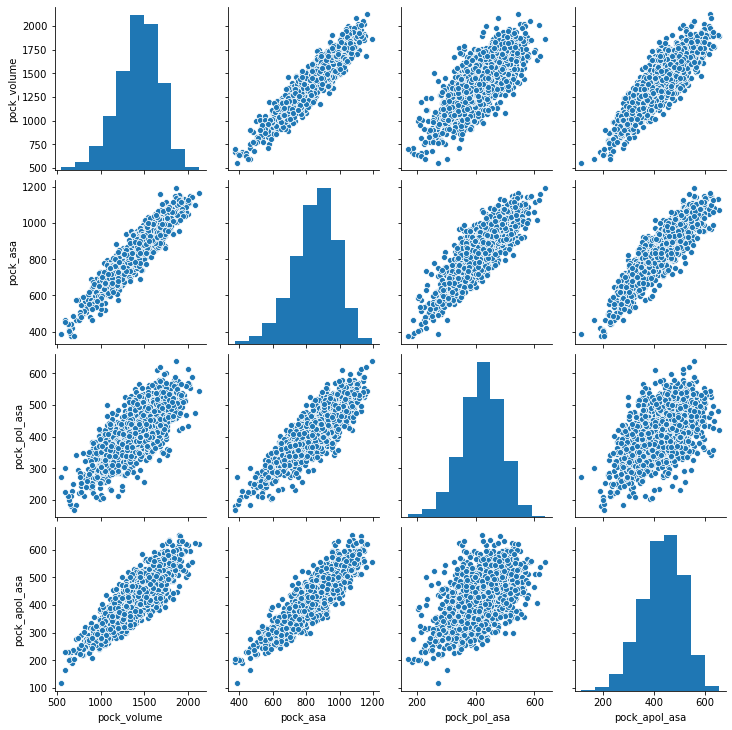

In [36]:
sns.pairplot(data[['pock_volume','pock_asa','pock_pol_asa','pock_apol_asa']])

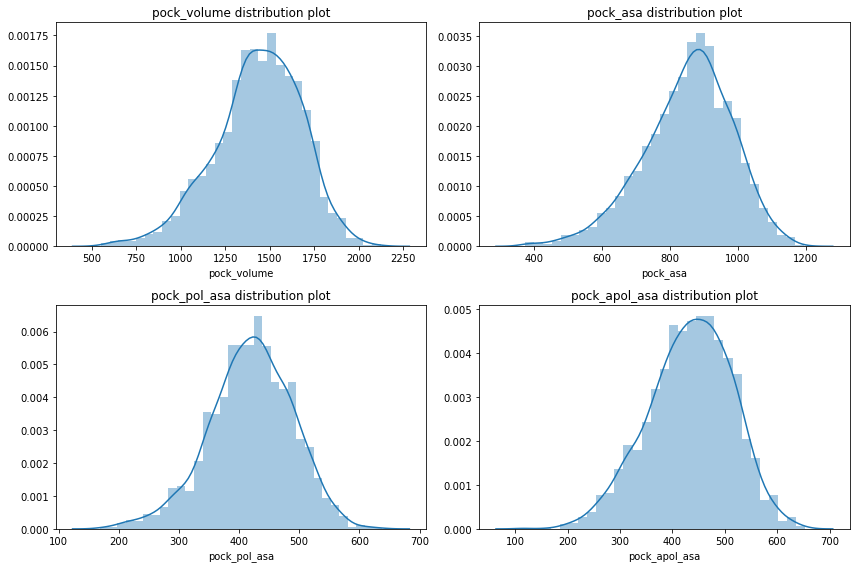

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for i, d in enumerate(['pock_volume','pock_asa','pock_pol_asa','pock_apol_asa']):
    sns.distplot(data[d], ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(f'{d} distribution plot')
fig.tight_layout()
plt.show()

In [38]:
from sklearn.cluster import KMeans

In [39]:
X = data.iloc[:,1:5]

In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [41]:
centers = kmeans.cluster_centers_

In [42]:
import itertools

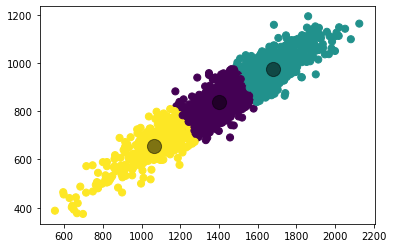

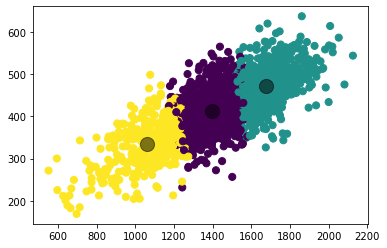

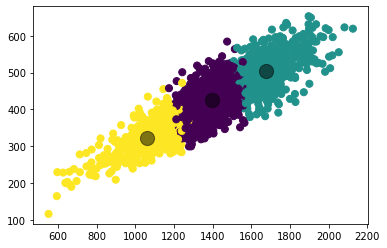

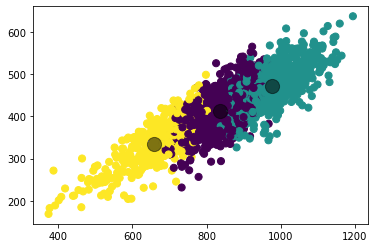

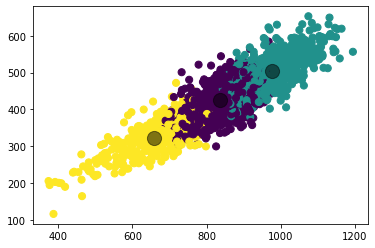

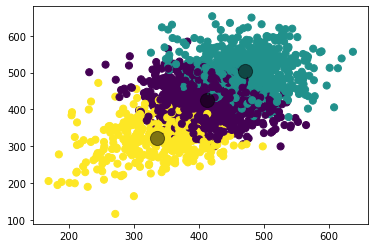

In [44]:
for i, j in itertools.combinations([e for e in range(4)], 2):
    plt.scatter(X.iloc[:,i], X.iloc[:,j], c=y_kmeans, s=50)
    plt.scatter(centers[:,i], centers[:,j], c='black', s=200, alpha=0.5)
    plt.show()

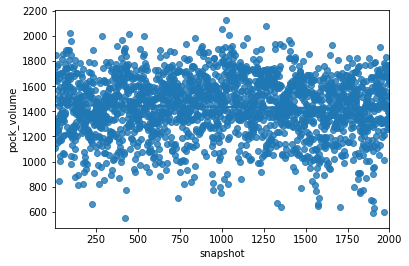

In [45]:
sns.regplot(data=data, y='pock_volume', x='snapshot')